<table width="100%" style="border:none">
  <tr>
    <td valign="top">
      <h1>Ex-Files Similarity</h1>
      <ul>
<li>Author: Jeremy Yang
<li>Required: Python3, Pandas 0.22+
<li>Comparison of gene expression profiles.
<li>Metrics: 
  <ul>
    <li>Pearson correlation
    <li>Spearman rank correlation
    <li>Weighted Spearman rank correlation (not yet)
    <li>Tanimoto similarity
    <li>Area Between Curves
  </ul>
<li>Designed for GTEx RNAseq data with 20+ tissues.
      </ul>
      [About Colaboratory](https://research.google.com/colaboratory/faq.html).
    </td>
    <td align="right">
        <p>NIH Data Commons: Team Helium</p>
<img style="float:right" width="100" src="https://avatars2.githubusercontent.com/u/33356654?s=200&v=4" alt="HeliumDataCommons Logo" />
    </td>
  </tr>
  </table>
 

In [31]:
import sys,os,re,time,io
import urllib.request
import google.colab
import numpy,scipy
import pandas
print('Python: %s; Pandas: %s; Scipy: %s ; Numpy: %s'%(sys.version.split()[0],pandas.__version__,scipy.__version__,numpy.__version__))

Python: 3.6.3; Pandas: 0.22.0; Scipy: 0.19.1 ; Numpy: 1.14.5


### Upload profiles datafile:

In [32]:
print('Upload profiles datafile: ')
uploaded = google.colab.files.upload()
fn = list(uploaded.keys())[0]
print('Uploaded "{name}" with {length} bytes'.format(name=fn, length=len(uploaded[fn])))
exfiles = pandas.read_csv(io.StringIO(uploaded[fn].decode('utf8')), sep='\t')
print("dataset nrows: %d ; ncols: %d:"%(exfiles.shape[0],exfiles.shape[1]), file=sys.stderr)

Upload profiles datafile: 


Saving gtex_rnaseq_prep_profiles.tsv to gtex_rnaseq_prep_profiles (2).tsv
Uploaded "gtex_rnaseq_prep_profiles.tsv" with 41987 bytes


dataset nrows: 246 ; ncols: 32:


In [33]:
exfiles.head()

,ENSG,SEX,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Cerebellum,...,Muscle - Skeletal,Nerve - Tibial,Pancreas,Pituitary,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Thyroid
0,ENSG00000039139.9,female,0.078,0.053,0.079,0.083,0.064,0.046,0.613,0.386,...,0.012,0.145,0.569,3.337,0.072,0.091,0.147,0.096,0.628,1.075
1,ENSG00000082516.8,female,15.570,11.120,7.940,10.420,10.570,12.920,13.780,9.530,...,10.220,15.830,3.412,10.560,11.280,13.910,6.424,9.688,5.186,10.830
2,ENSG00000100302.6,female,2.329,2.002,2.873,18.810,6.090,3.982,5.712,8.445,...,6.118,1.768,1.031,4.525,2.015,2.481,6.015,0.417,1.772,2.306
3,ENSG00000100580.7,female,7.470,7.314,11.330,7.127,7.600,9.406,10.050,12.980,...,2.065,10.265,3.321,19.740,6.604,6.659,7.210,14.510,5.252,15.160
4,ENSG00000101200.5,female,0.696,0.143,0.295,0.000,0.052,0.000,0.194,0.320,...,0.030,0.026,0.000,0.278,0.000,0.000,0.023,0.055,0.000,0.075


In [34]:
exfiles.describe()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Cerebellum,Brain - Cortex,Colon - Sigmoid,...,Muscle - Skeletal,Nerve - Tibial,Pancreas,Pituitary,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Thyroid
count,234.000000,228.000000,220.000000,228.000000,218.000000,226.000000,188.000000,208.000000,210.000000,226.000000,...,228.000000,230.000000,222.000000,218.000000,232.000000,232.000000,224.000000,214.000000,230.000000,234.000000
mean,15.762603,17.043785,7.679109,13.857654,14.240252,13.522394,13.015468,7.206543,5.984771,9.562646,...,3.446789,12.367235,2.369937,7.902665,9.866616,11.322362,5.858228,60.663972,4.716596,9.963692
std,56.491187,67.515217,21.793660,70.326781,64.142451,76.865723,38.370785,19.550892,20.109712,39.361763,...,13.119360,46.186530,6.080864,21.246520,29.611140,39.326352,15.018161,546.988278,13.427820,29.885929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046250,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.132000,0.103000,0.109000,0.112000,0.168500,0.067000,0.830000,0.384500,0.239500,0.116000,...,0.000000,0.195000,0.058500,0.474500,0.161500,0.177500,0.180500,0.233000,0.098500,0.277500
75%,2.723250,2.332750,2.633000,2.405500,2.901250,2.476750,6.361250,6.408000,3.053250,1.924000,...,0.797250,4.532750,1.371500,5.611000,3.169500,3.495250,3.775000,5.451250,2.053000,4.248250
max,448.300000,693.650000,128.500000,700.900000,605.000000,802.600000,304.200000,134.400000,181.200000,381.800000,...,126.050000,425.650000,44.635000,179.000000,209.400000,390.150000,85.325000,6355.000000,84.425000,185.600000


### Read and merge gene symbols.
File from https://www.ensembl.org/biomart, dataset human genes, fields Gene stable ID, Gene stable ID version,  NCBI gene ID, HGNC symbol.

In [35]:
print('Upload Biomart ENSG2NCBI genes datafile: ')
uploaded = google.colab.files.upload()
fn = list(uploaded.keys())[0]
print('Uploaded "{name}" with {length} bytes'.format(name=fn, length=len(uploaded[fn])))
genes = pandas.read_csv(io.StringIO(uploaded[fn].decode('utf8')), sep='\t', usecols=[1,2,3], na_values=[''], dtype={2:str})
genes.columns = ['ENSG','NCBI','HGNC']
genes.dropna(inplace=True)

Upload Biomart ENSG2NCBI genes datafile: 


Saving biomart_ENSG2NCBI.tsv to biomart_ENSG2NCBI (1).tsv
Uploaded "biomart_ENSG2NCBI.tsv" with 2786143 bytes


In [36]:
genes.head()

,ENSG,NCBI,HGNC
1,ENSG00000211459.2,4549,MT-RNR1
3,ENSG00000210082.2,4550,MT-RNR2
5,ENSG00000198888.2,4535,MT-ND1
9,ENSG00000198763.3,4536,MT-ND2
15,ENSG00000198804.2,4512,MT-CO1


In [0]:
exfiles = pandas.merge(exfiles, genes, on='ENSG', how='inner')
exfiles = exfiles[['ENSG','HGNC','NCBI','SEX']+(exfiles.columns[3:exfiles.columns.size-2]).tolist()]

In [38]:
exfiles.head()

,ENSG,HGNC,NCBI,SEX,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,...,Muscle - Skeletal,Nerve - Tibial,Pancreas,Pituitary,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Thyroid
0,ENSG00000039139.9,DNAH5,1767,female,0.053,0.079,0.083,0.064,0.046,0.613,...,0.012,0.145,0.569,3.337,0.072,0.091,0.147,0.096,0.628,1.075
1,ENSG00000039139.9,DNAH5,1767,male,0.064,0.079,0.072,0.066,0.058,0.922,...,0.010,0.166,0.596,2.816,0.073,0.113,0.130,0.077,0.679,1.096
2,ENSG00000082516.8,GEMIN5,25929,female,11.120,7.940,10.420,10.570,12.920,13.780,...,10.220,15.830,3.412,10.560,11.280,13.910,6.424,9.688,5.186,10.830
3,ENSG00000082516.8,GEMIN5,25929,male,10.310,7.612,10.320,10.430,12.480,13.385,...,9.188,16.220,3.764,9.512,10.125,13.095,6.367,9.679,5.703,12.010
4,ENSG00000100302.6,RASD2,23551,female,2.002,2.873,18.810,6.090,3.982,5.712,...,6.118,1.768,1.031,4.525,2.015,2.481,6.015,0.417,1.772,2.306


### Pearson correlation coefficient

In [0]:
def Pearson_NxN(exfiles, idcols, datacols, minval):
  idcoltags = exfiles.columns[idcols]
  results = pandas.DataFrame(index=range(int(exfiles.shape[0]**2/2)))    #N^2/2, upper bound
  for tag in idcoltags:
    results[tag+'A'] = pandas.Series()
  for tag in idcoltags:
    results[tag+'B'] = pandas.Series()
  results['Pearson'] = pandas.Series(dtype='float')
  
  n_out=0; n_nan=0; n_submin=0;
  for iA in range(exfiles.shape[0]):
    A = exfiles.iloc[iA,datacols]
    for iB in range(iA+1, exfiles.shape[0]):
      B = exfiles.iloc[iB,datacols]
      c = numpy.corrcoef(numpy.array([A.tolist(),B.tolist()]))[0][1]
      if numpy.isnan(c):
        n_nan+=1
        continue
      elif c<minval:
        n_submin+=1
        continue
      idvalsA = exfiles.iloc[iA,idcols].tolist()
      idvalsB = exfiles.iloc[iB,idcols].tolist()
      j=0
      for idval in idvalsA+idvalsB:
        results.iloc[n_out,j] = idval
        j+=1
      results.iloc[n_out,j] = c
      n_out+=1
  results = results.dropna(how='any') #Remove unused rows
  print("n_out: %d"%(n_out))
  print("n_nan: %d"%(n_nan))
  print("n_submin: %d"%(n_submin))
  return(results)

In [41]:
results_Pearson = Pearson_NxN(exfiles, list(range(4)), list(range(4,exfiles.shape[1])), 0.5)
results_Pearson.head()

DEBUG: Pearson_NxN IN: nrows = 246, cols: ['ENSG', 'HGNC', 'NCBI', 'SEX', 'Adipose - Visceral (Omentum)', 'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary', 'Artery - Tibial', 'Bladder', 'Brain - Cerebellum', 'Brain - Cortex', 'Colon - Sigmoid', 'Colon - Transverse', 'Esophagus - Gastroesophageal Junction', 'Esophagus - Mucosa', 'Esophagus - Muscularis', 'Heart - Atrial Appendage', 'Heart - Left Ventricle', 'Kidney - Cortex', 'Liver', 'Lung', 'Minor Salivary Gland', 'Muscle - Skeletal', 'Nerve - Tibial', 'Pancreas', 'Pituitary', 'Skin - Not Sun Exposed (Suprapubic)', 'Skin - Sun Exposed (Lower leg)', 'Small Intestine - Terminal Ileum', 'Spleen', 'Stomach', 'Thyroid']
DEBUG: idcols = [0, 1, 2, 3] ; datacols = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
DEBUG: idcoltags = Index(['ENSG', 'HGNC', 'NCBI', 'SEX'], dtype='object')


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


n_out: 1454
n_nan: 15429
n_submin: 13252


,ENSGA,HGNCA,NCBIA,SEXA,ENSGB,HGNCB,NCBIB,SEXB,Pearson
0,ENSG00000039139.9,DNAH5,1767,female,ENSG00000039139.9,DNAH5,1767,male,0.983544
1,ENSG00000039139.9,DNAH5,1767,female,ENSG00000170270.4,GON7,84520,female,0.603809
2,ENSG00000039139.9,DNAH5,1767,female,ENSG00000170270.4,GON7,84520,male,0.526044
3,ENSG00000039139.9,DNAH5,1767,female,ENSG00000172568.4,FNDC9,408263,male,0.508407
4,ENSG00000039139.9,DNAH5,1767,female,ENSG00000184451.5,CCR10,2826,female,0.505454


In [42]:
results_Pearson.describe()

,Pearson
count,1454.000000
mean,0.670249
std,0.136972
min,0.500272
25%,0.558491
50%,0.636643
75%,0.741618
max,0.999683


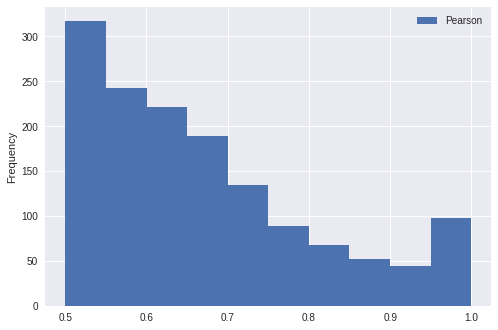

In [43]:
results_Pearson.plot.hist(y='Pearson')

### Spearman rank correlation coefficient

In [0]:
def Spearman_NxN(exfiles, idcols, datacols, minval):
  idcoltags = exfiles.columns[idcols]
  print("DEBUG: idcols = %s ; datacols = %s"%(str(idcols),str(datacols)))
  print("DEBUG: idcoltags = %s"%(str(idcoltags)))
  results = pandas.DataFrame(index=range(int(exfiles.shape[0]**2/2)))    #N^2/2, upper bound
  for tag in idcoltags:
    results[tag+'A'] = pandas.Series()
  for tag in idcoltags:
    results[tag+'B'] = pandas.Series()
  results['SpearmanRho'] = pandas.Series(dtype='float')
  results['SpearmanP'] = pandas.Series(dtype='float')

  n_out=0; n_nan=0; n_submin=0; n_err=0;
  for iA in range(exfiles.shape[0]):
    A = exfiles.iloc[iA,datacols]
    for iB in range(iA+1, exfiles.shape[0]):
      B = exfiles.iloc[iB,datacols]
      try:
        rho,pval = scipy.stats.spearmanr(A,B)
      except Exception as e:
        n_err+=1
        continue
      if numpy.isnan(rho):
        n_nan+=1
        continue
      elif rho<minval:
        n_submin+=1
        continue
      idvalsA = exfiles.iloc[iA,idcols].tolist()
      idvalsB = exfiles.iloc[iB,idcols].tolist()
      j=0
      for idval in idvalsA+idvalsB:
        results.iloc[n_out,j] = idval
        j+=1
      results.iloc[n_out,j] = rho
      results.iloc[n_out,j+1] = pval
      n_out+=1
  results = results.dropna(how='any') #Remove unused rows
  print("n_out: %d"%(n_out))
  print("n_nan: %d"%(n_nan))
  print("n_submin: %d"%(n_submin))
  print("n_err: %d"%(n_err))
  return(results)

In [49]:
results_Spearman = Spearman_NxN(exfiles, list(range(4)), list(range(4,exfiles.shape[1])), 0.5)
results_Spearman.head()

DEBUG: Spearman_NxN IN: nrows = 246, cols: ['ENSG', 'HGNC', 'NCBI', 'SEX', 'Adipose - Visceral (Omentum)', 'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary', 'Artery - Tibial', 'Bladder', 'Brain - Cerebellum', 'Brain - Cortex', 'Colon - Sigmoid', 'Colon - Transverse', 'Esophagus - Gastroesophageal Junction', 'Esophagus - Mucosa', 'Esophagus - Muscularis', 'Heart - Atrial Appendage', 'Heart - Left Ventricle', 'Kidney - Cortex', 'Liver', 'Lung', 'Minor Salivary Gland', 'Muscle - Skeletal', 'Nerve - Tibial', 'Pancreas', 'Pituitary', 'Skin - Not Sun Exposed (Suprapubic)', 'Skin - Sun Exposed (Lower leg)', 'Small Intestine - Terminal Ileum', 'Spleen', 'Stomach', 'Thyroid']
DEBUG: idcols = [0, 1, 2, 3] ; datacols = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
DEBUG: idcoltags = Index(['ENSG', 'HGNC', 'NCBI', 'SEX'], dtype='object')


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


n_out: 1670
n_nan: 345
n_submin: 13036
n_err: 15084


,ENSGA,HGNCA,NCBIA,SEXA,ENSGB,HGNCB,NCBIB,SEXB,SpearmanRho,SpearmanP
0,ENSG00000039139.9,DNAH5,1767,female,ENSG00000039139.9,DNAH5,1767,male,0.984236,7.490236e-22
1,ENSG00000039139.9,DNAH5,1767,female,ENSG00000132911.4,NMUR2,56923,female,0.554013,1.819873e-03
2,ENSG00000039139.9,DNAH5,1767,female,ENSG00000147003.5,TMEM27,57393,female,0.674714,5.962736e-05
3,ENSG00000039139.9,DNAH5,1767,female,ENSG00000147003.5,TMEM27,57393,male,0.648768,1.408007e-04
4,ENSG00000039139.9,DNAH5,1767,female,ENSG00000152128.13,TMEM163,81615,female,0.547783,2.098437e-03


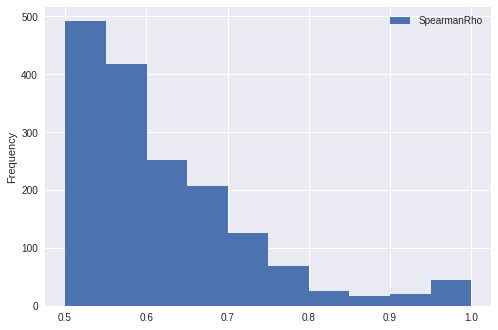

In [54]:
results_Spearman.plot.hist(y='SpearmanRho')

### Tanimoto similarity
There is not a universally accepted definition of Tanimoto similarity for real valued vectors, as indicated by the [Jaccard index Wikipedia page](https://en.wikipedia.org/wiki/Jaccard_index). Generalizing from the bitvector form, we use the ratio of (in common) to (could be in common), using the vector dot products:

> ## $ sim = \frac{A * B}{|A|^2 + |B|^2 - A*B} $

Function range [0,1]. Unlike Cartesian distance, Jaccard/Tanimoto normalizes for vector size.

In [0]:
def Tanimoto_NxN(exfiles, idcols, datacols, minval):
  idcoltags = exfiles.columns[idcols]
  results = pandas.DataFrame(index=range(int(exfiles.shape[0]**2/2)))    #N^2/2, upper bound
  for tag in idcoltags:
    results[tag+'A'] = pandas.Series()
  for tag in idcoltags:
    results[tag+'B'] = pandas.Series()
  results['Tanimoto'] = pandas.Series(dtype='float')

  #First compute |V|^2 for each vector.
  VV = numpy.ndarray(shape=(exfiles.shape[0],1), dtype=float)
  for i in range(exfiles.shape[0]):
    V = exfiles.iloc[i,datacols]
    VV[i] = numpy.dot(V,V)

  n_out=0; n_nan=0; n_submin=0;
  for iA in range(exfiles.shape[0]):
    A = exfiles.iloc[iA,datacols]
    for iB in range(iA+1, exfiles.shape[0]):
      B = exfiles.iloc[iB,datacols]
      AA = VV[iA]
      BB = VV[iB]
      AB = numpy.dot(A,B)
      den = AA + BB - AB
      t = (AB / den) if den>0 else numpy.nan
      if numpy.isnan(t):
        n_nan+=1
        continue
      elif t<minval:
        n_submin+=1
        continue
      idvalsA = exfiles.iloc[iA,idcols].tolist()
      idvalsB = exfiles.iloc[iB,idcols].tolist()
      j=0
      for idval in idvalsA+idvalsB:
        results.iloc[n_out,j] = idval
        j+=1
      results.iloc[n_out,j] = t
      n_out+=1
  results = results.dropna(how='any') #Remove unused rows
  print("n_out: %d"%(n_out))
  print("n_nan: %d"%(n_nan))
  print("n_submin: %d"%(n_submin))
  return(results)

In [53]:
results_Tanimoto = Tanimoto_NxN(exfiles, list(range(4)), list(range(4,exfiles.shape[1])), 0.5)
results_Tanimoto.head()

n_out: 520
n_nan: 15085
n_submin: 14530


,ENSGA,HGNCA,NCBIA,SEXA,ENSGB,HGNCB,NCBIB,SEXB,Tanimoto
0,ENSG00000039139.9,DNAH5,1767,female,ENSG00000039139.9,DNAH5,1767,male,0.954722
1,ENSG00000039139.9,DNAH5,1767,male,ENSG00000203872.6,C6orf163,206412,female,0.526465
2,ENSG00000039139.9,DNAH5,1767,male,ENSG00000203872.6,C6orf163,206412,male,0.518786
3,ENSG00000082516.8,GEMIN5,25929,female,ENSG00000082516.8,GEMIN5,25929,male,0.991732
4,ENSG00000082516.8,GEMIN5,25929,female,ENSG00000100580.7,TMED8,283578,female,0.839777


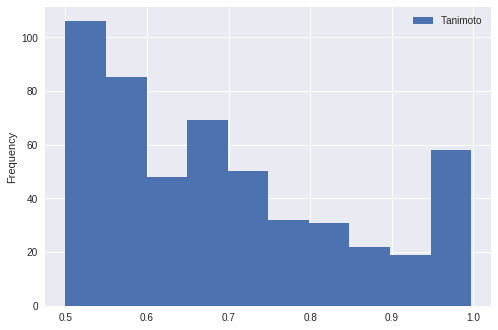

In [55]:
results_Tanimoto.plot.hist(y='Tanimoto')

### Area Under Line Segment (AULS)

In [0]:
def AULS(y1, y2, w):
  a = min(y1,y2) * w
  a = a + 0.5 * w * abs(y1-y2)
  return(a)

### Area Between Curves (ABC)
 * Novel metric proposed by Giovanni Bocci.
 * (Sum and subtract triangle areas.) 

In [0]:
def ABC(A,B):
  abc = 0.0
  for i in range(len(A)-1):
    Amid = numpy.mean(A[i:i+1])
    Bmid = numpy.mean(B[i:i+1])
    if (A[i]>=B[i]):
      if (A[i+1]>=B[i+1]):
        abc = abc + (AULS(A[i], A[i+1], 1) - AULS(B[i], B[i+1], 1))
      else:
        abc = abc + (AULS(A[i], Amid, .5) - AULS(B[i], Bmid , .5))
        abc = abc + (AULS(Bmid, B[i+1], .5) - AULS(Amid, A[i+1], .5))
    else:
      if (A[i+1]<B[i+1]):
        abc = abc + (AULS(B[i], B[i+1], 1) - AULS(A[i], A[i+1], 1))
      else:
        abc = abc + (AULS(B[i], Bmid, .5) - AULS(A[i], Amid , .5))
        abc = abc + (AULS(Amid, A[i+1], .5) - AULS(Bmid, B[i+1], .5))
  return(abc)

In [0]:
def ABC_NxN(exfiles, idcols, datacols, minval):
  idcoltags = exfiles.columns[idcols]
  results = pandas.DataFrame(index=range(int(exfiles.shape[0]**2/2)))    #N^2/2, upper bound
  for tag in idcoltags:
    results[tag+'A'] = pandas.Series()
  for tag in idcoltags:
    results[tag+'B'] = pandas.Series()
  results['ABC'] = pandas.Series(dtype='float')
  results['ABC_sim'] = pandas.Series(dtype='float')
  
  n_out=0; n_nan=0; n_submin=0;
  for iA in range(exfiles.shape[0]):
    A = exfiles.iloc[iA,datacols]
    for iB in range(iA+1, exfiles.shape[0]):
      B = exfiles.iloc[iB,datacols]
      abc = ABC(A,B)
      abc_sim = (1 / (1 + abc/len(A)))
      if numpy.isnan(abc_sim):
        n_nan+=1
        continue
      elif abc_sim<minval:
        n_submin+=1
        continue
      idvalsA = exfiles.iloc[iA,idcols].tolist()
      idvalsB = exfiles.iloc[iB,idcols].tolist()
      j=0
      for idval in idvalsA+idvalsB:
        results.iloc[n_out,j] = idval
        j+=1
      results.iloc[n_out,j] = abc
      results.iloc[n_out,j+1] = abc_sim
      n_out+=1
  results = results.dropna(how='any') #Remove unused rows
  print("n_out: %d"%(n_out))
  print("n_nan: %d"%(n_nan))
  print("n_submin: %d"%(n_submin))
  return(results)

In [63]:
results_ABC = ABC_NxN(exfiles, list(range(4)), list(range(4,exfiles.shape[1])), 0.5)
results_ABC.head()

n_out: 2804
n_nan: 15084
n_submin: 12247


,ENSGA,HGNCA,NCBIA,SEXA,ENSGB,HGNCB,NCBIB,SEXB,ABC,ABC_sim
0,ENSG00000039139.9,DNAH5,1767,female,ENSG00000039139.9,DNAH5,1767,male,2.26225,0.927636
1,ENSG00000039139.9,DNAH5,1767,female,ENSG00000101200.5,AVP,551,female,11.74650,0.711718
2,ENSG00000039139.9,DNAH5,1767,female,ENSG00000101200.5,AVP,551,male,12.07825,0.705970
3,ENSG00000039139.9,DNAH5,1767,female,ENSG00000132911.4,NMUR2,56923,female,12.37625,0.700885
4,ENSG00000039139.9,DNAH5,1767,female,ENSG00000132911.4,NMUR2,56923,male,11.77875,0.711155


In [65]:
results_ABC.describe()

,ABC,ABC_sim
count,2804.000000,2804.000000
mean,9.251722,0.786702
std,7.703995,0.143633
min,0.000000,0.500980
25%,2.866250,0.652870
50%,6.198250,0.823905
75%,15.419250,0.910054
max,28.886500,1.000000


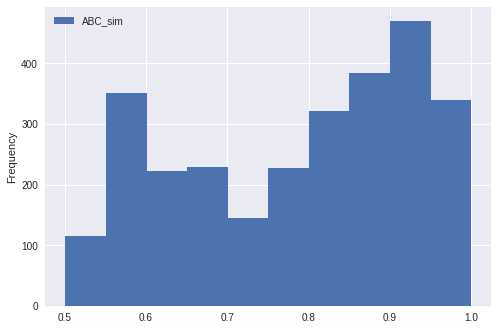

In [64]:
results_ABC.plot.hist(y='ABC_sim')